In [1]:
import cv2 as cv2
import numpy
import matplotlib.pyplot
import ipywidgets
import threading


Open image

Image loaded


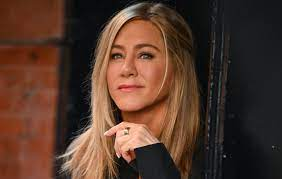

Image displayed


In [2]:
from IPython.display import Image
try:
    x=(Image(filename='../../image.jpg'))
except:
    print("Issue with image")
else:
    print("Image loaded")
    
    
try:
    display(x)
except:
    print("Error")
else:
    print("Image displayed")


In [3]:
import cv2 as cv2
#init matrix
img = cv2.imread("../../image.jpg")

cv2.imshow("Original Image", img) # This will open an independent window

        
while True:
    if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
        cv2.destroyAllWindows()
        break
    
    

This displays the video in a widow

In [4]:
camera = cv2.VideoCapture(1,cv2.CAP_DSHOW)

#camera = cv2.VideoCapture(0)
camera.set(3,1000) # adjust width
camera.set(4,1000) # adjust height



while True:
    success, img = camera.read()
    cv2.imshow("Webcam", img) # This will open an independent window
    if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
        camera.release()
        break
        
cv2.destroyAllWindows() 
cv2.waitKey(1) # normally unnecessary, but it fixes a bug on MacOS where the window doesn't close


-1

Record and save video as mp4

In [5]:
import cv2 as cv2

camera = cv2.VideoCapture(1,cv2.CAP_DSHOW)

#camera = cv2.VideoCapture(0)

frame_width = int(camera.get(3))
frame_height = int(camera.get(4))
camera.set(3,frame_width) # adjust width
camera.set(4,frame_height) # adjust height
size = (frame_width, frame_height)



fourcc = cv2.VideoWriter_fourcc(*'XVID')

out = cv2.VideoWriter('opencv-video.mp4',cv2.VideoWriter_fourcc(*'H264'),30, size)


while True:
    
    success, img = camera.read()
    if success:
        cv2.imshow("Webcam", img) # This will open an independent window
        out.write(img)
    if cv2.waitKey(1) & 0xFF==ord('q'): # quit when 'q' is pressed
        camera.release()
        out.release()
        break
cv2.destroyAllWindows()

Play the video

In [6]:
FPS=30
vid = cv2.VideoCapture('opencv-video.mp4')
if (vid.isOpened()== False): 
    print("Not open")
    
while(vid.isOpened()):
  # Capture each frame
    ret, frame = vid.read()
    if ret == True:
        cv2.imshow('Video Recording',frame)
      # Display the resulting frame
    if cv2.waitKey(FPS) & 0xFF==ord('q'): # quit when 'q' is pressed
        vid.release()
        break
vid.release()
cv2.destroyAllWindows() 